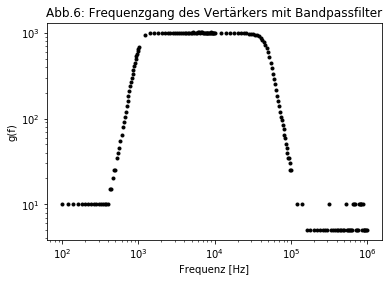

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2

#Die Messdaten aus der Aufgabe 3 werden importiert
f, U_aus = np.loadtxt('C:/Users/Max/Dropbox/Uni/Python/mit bandpass.txt' , skiprows = 1, usecols = (0,1), unpack = True)

D = 1e-3 #Dämpfung
U_ein = 0.2 #Eingangsspannung [V]
g = U_aus / (U_ein * D) #Frequenzgang g(f) gemäß Gleichung 4

#Frequenzgang wird doppeltlogarithmisch geplottet
plt.loglog( f, g, linestyle = 'None', marker = '.', color="black")
plt.xlabel('Frequenz [Hz]')
plt.ylabel('g(f)')
plt.title('Abb.6: Frequenzgang des Vertärkers mit Bandpassfilter')

#Plot wird gespeichert
plt.savefig("C:/Users/Max/dropbox/Uni/python/v243_6.pdf", format="pdf")

V= 1000.90837253
W1= 1030.23769078
W2= 46414.9650135
n1= 5.08210362681
n2= 4.6596042416


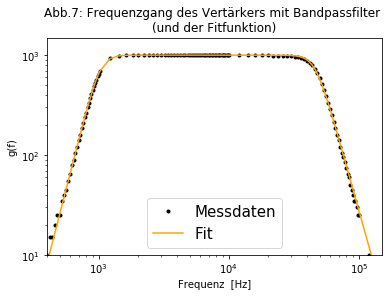

In [80]:
#Fitfunktion wird wie im Protokoll beschrieben definiert
def fit_func(f, V, W1, W2, n1, n2):
    return V/(np.sqrt(1+1/(f/W1)**(2*n1))*np.sqrt(1+(f/W2)**(2*n2)))

#Als Startwerte des Fits werden V=1000, W1=1000, W2=50000 und n1=n2=5 gewählt 
p0=[1000, 1000, 50000, 5, 5]

popt, pcov = curve_fit(fit_func, f[20:-45], g[20:-45], p0)

#Werte für sehr niedriege und sehr hohe Frequenzen werden normalerweise von den Messgeräten ungenauer 
#gemessen und werden deshalb nicht in den Fit miteinbezogen

#Angefittete Funktion wird geplottet
plt.loglog(f[15:-43], g[15:-43], linestyle = 'None', marker = '.', label='Messdaten', color="black")
plt.loglog(f, fit_func(f, *popt), label='Fit', color="Orange")
plt.xlabel('Frequenz  [Hz]')
plt.ylabel('g(f)')
plt.axis([4e2, 1.5e5, 10, 1.5e3 ])
plt.title('Abb.7: Frequenzgang des Vertärkers mit Bandpassfilter \n(und der Fitfunktion)')
plt.legend(loc='lower center', fontsize=15)

#Fitparameter werden ausgegeben
print("V=",popt[0])
print("W1=",popt[1])
print("W2=",popt[2])
print("n1=",popt[3])
print("n2=",popt[4])

#Plot wird gespeichert
plt.savefig("C:/Users/Max/dropbox/Uni/python/v243_7.pdf", format="pdf")

In [81]:
#g(f)**2 wird definiert
def fit_func_square(f,V,W1,W2,n1,n2): 
    return fit_func(f,V,W1,W2,n1,n2)**2

#g(f)**2 wird numerisch integriert
B = integrate.quad(fit_func_square, f[20], f[-43], args = tuple(popt))

print ('Das Integral beträgt: {value:.4e}'.format(value = B[0]))

Das Integral beträgt: 4.6343e+10


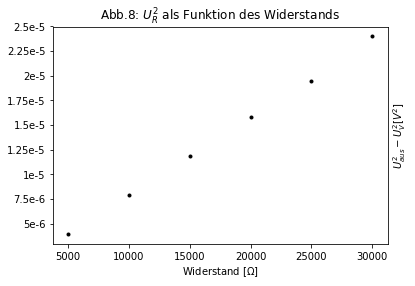

In [82]:
import matplotlib.ticker as tick
from matplotlib.ticker import OldScalarFormatter, ScalarFormatter

B_=B[0] #Betrag des Integrals

#Definition der Variablen
R = np.array([5e3, 10e3, 15e3, 20e3, 25e3, 30e3]) #Widerstände
d_R = R*0.005 #Fehler der Widerständen

U_aus = np.array([2.425e-3,3.134e-3,3.710e-3,4.217e-3,4.626e-3,5.090e-3]) #gemessene Ausgangsspannung
d_U_aus = np.array([0.0009, 0.0011, 0.0012, 0.0015, 0.0020, 0.0020])*1e-3/np.sqrt(100) #Fehler des Mittelwerts

U_V = 1.394e-3 #Eigenrauschen des Versärkers
d_U_V = 0.0005e-3/np.sqrt(100) #Fehler von U_V

U_R = U_aus**2 - U_V**2 #Differenz der Quadrate
d_U_R = D*np.sqrt((d_U_V/U_V)**2 + (d_U_aus/U_aus)**2)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(R,U_R, ".",color="black")

plt.title('Abb.8: $U_R^2$ als Funktion des Widerstands')
plt.legend(loc='best')
plt.xlabel('Widerstand [$\Omega$]')
plt.ylabel('$U_{aus}^2-U_V^2 [V^2]$')
ax.yaxis.set_label_position("right")
ax.yaxis.set_major_formatter(OldScalarFormatter())

#Plot wird gespeichert
plt.savefig("C:/Users/Max/dropbox/Uni/python/v243_8.pdf", format="pdf")

Steigung der Gerade: c =  7.90305971423e-10 Standardfehler zu c: dc =  3.73929637964e-12


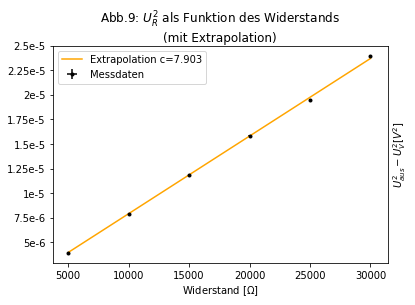

In [83]:
#Eine Gerade durch den Ursprung wird definiert
def linear(x,c):
    return c*x

#und an die Messdaten angefittet, anschließend gepolottet
popt, pcov = curve_fit( linear, R , U_R)


fig = plt.figure()
ax = fig.add_subplot(111)

plt.errorbar( R , U_R , xerr = d_R, yerr = d_U_R, fmt = '.' , label='Messdaten', color="black")
plt.plot( R, linear(R , *popt), label='Extrapolation c={}'.format(round(popt[0]*1e10,3)), color="Orange")

plt.title('Abb.9: $U_R^2$ als Funktion des Widerstands \n(mit Extrapolation)')
plt.xlabel('Widerstand [$\Omega$]')
plt.ylabel('$U_{aus}^2-U_V^2 [V^2]$')
ax.yaxis.set_label_position("right")
ax.yaxis.set_major_formatter(OldScalarFormatter())
plt.legend()

#Plot wird gespeichert
plt.savefig("C:/Users/Max/dropbox/Uni/python/v243_9.pdf", format="pdf")

print('Steigung der Gerade: c = ' ,popt[0], 'Standardfehler zu c: dc = ', np.sqrt(pcov[0,0]))

#Fehler der Steigung dc wird berechnet
dc_=np.sqrt(pcov[0,0])
plt.show()
c=popt[0]

In [84]:
#Chi-Quadrat-Summe wird ausgerechnet
chisquare=np.sum(((linear(R,*popt)-D)**2))

dof=5 #Anzahl der Freiheitsgrade

#Reduzierte Chi-Quadrat-Summe wird ausgerechnet
chisquare_red=chisquare/dof

print('chisquare=', chisquare, 'chisquare_red=', chisquare_red)

#Fitwahrscheinlichkeit wird ausgerechnet
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Fitwahrscheinlichkeit =' +str(prob)+'%')

chisquare= 5.83545667353e-06 chisquare_red= 1.16709133471e-06
Fitwahrscheinlichkeit =100.0%


In [85]:
T=273.15+22.6 #absolute Temperatur
dT=1 #Fehler der Temperatur

#Boltzmannkonstante wird ausgerechnet
k=c/(4*T*B_) 

#statistischer Fehler wird ausgerechnet
d_k_stat=k*dc_/c

#Für den systematischen Fehler von B wird dB/B=2% angenommen
db=0.02

#Systematischer Fehler wird ausgerechnet
d_k_syst=k*np.sqrt(db**2+(dT/T)**2) 

print('Boltzmannkonstante beträgt k=(',k,'+/-',d_k_stat,'stat.','+/-',d_k_syst,'syst.)J/K')

Boltzmannkonstante beträgt k=( 1.44155342223e-23 +/- 6.82064376039e-26 stat. +/- 2.92401884816e-25 syst.)J/K
